In [57]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension ("tabulator", template="material", sizing_mode="stretch_width")
import holoviews as hv
import hvplot.pandas

In [109]:
def load_data(): 
    #https://docs.google.com/spreadsheets/d/1kStjblKG1VVOWM0HE5ZdXjyfCr8fsWQhGxx4B9_WPPE/edit?usp=sharing  this is the base link (google sheet link)
    sheet_id="1kStjblKG1VVOWM0HE5ZdXjyfCr8fsWQhGxx4B9_WPPE"    
    df_google_sheet= pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")    #add this /export?format=csv
    print(df_google_sheet)


In [100]:
#from data to dashboard
df_google_sheet=df_google_sheet.interactive()
df_google_sheet1=df_google_sheet.hvplot.table( sortable=True, selectable=True)  
mini_dashboard1=pn.Column(df_google_sheet1)
mini_dashboard1.show()


Launching server at http://localhost:49635


In [112]:
#automate the process of loading data
import time

while(True):
    load_data()
    time.sleep(3)

   azam  iqbal  hamza  bilal
0     1      2      3      3
1     3      4      4      4
   azam  iqbal  hamza  bilal
0     1      2      3      3
1     3      4      4      4
   azam  iqbal  hamza  bilal
0     1      2      3      3
1     3      4      4      4
   azam  iqbal  hamza  bilal
0     1      2      3      3
1     3      4      4      4


KeyboardInterrupt: 

In [ ]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SPREADSHEET_ID = 'spreadsheet_url_ID'
DATA_TO_PULL = 'spreadsheet_tab_name'
data = pull_sheet_data(SCOPES,SPREADSHEET_ID,DATA_TO_PULL)
df = pd.DataFrame(data[1:], columns=data[0])
df

In [73]:
df = pd.read_csv("C:/Users/smhz_/Downloads/3-Eligible_Children.csv")
list(df["Detail-Province_name"].unique())
df.columns
#print(df.shape)

Index(['SubmissionDate', 'Enumerator_Name', 'Enumerator_Mobile', 'Survey_Day',
       'Survey_Time', 'Mobile_ID', 'note_Application_Setting',
       'group_check_constraints-note_missing_username',
       'group_check_constraints-note_missing_phone_number',
       'note_APPLICATION_VERSION', 'PREPOPULATE-Cluster_Code',
       'PREPOPULATE-Cluster_Code_2', 'ID_2', 'caluname', 'Detail-ID',
       'Detail-Province_name', 'Detail-Division', 'Detail-District_name',
       'Detail-Tehsil_name', 'Detail-Unname', 'Detail-Ucmo_name',
       'Detail-Settlement_name', 'Detail-Estimated_No_of_Households',
       'Detail-Cluster_No_BY_DEPARTMENT', 'Detail-note_UC_Details', 'ss-HH02',
       'ss-HH05', 'ss-HH06', 'ss-HH07', 'ss-HH07_MALE', 'ss-HH07_FEMALE',
       'ss-calc_total', 'ss-note_calc_total', 'ss-HH08_NAME', 'ss-HH08_MOBILE',
       'ss-HH08_Address', 'Age_Range_16_years', 'BR1_count',
       'Age_Range_16_years_Sum', 'note_Age_Range_16_years_View',
       'Age_Range_15_years_Less', 'Total

In [3]:
#ssho2 is the household number that is interviewed
useful_df=df[['PREPOPULATE-Cluster_Code','Detail-Province_name','Detail-District_name','ss-HH02','ss-HH08_NAME','Eligible_Childrens_Sum','ss-HH07_MALE','ss-HH07_FEMALE','Survey_Day']]
useful_df

,PREPOPULATE-Cluster_Code,Detail-Province_name,Detail-District_name,ss-HH02,ss-HH08_NAME,Eligible_Childrens_Sum,ss-HH07_MALE,ss-HH07_FEMALE,Survey_Day
0,78,AJK,Muzaffarabad,153,Haseeb,3,2,3,2022-11-19
1,73,AJK,Muzaffarabad,186,Deen,2,4,4,2022-11-19
2,70,AJK,Muzaffarabad,193,Muhammad najeeb,2,2,2,2022-11-19
3,85,AJK,Muzaffarabad,228,Maveen,2,0,5,2022-11-19
4,320,Balochistan,Quetta,40,Ghonx,4,3,6,2022-11-19
...,...,...,...,...,...,...,...,...,...
5846,1,AJK,Bhimber,96,Iqbal,0,2,0,2022-11-05
5847,1,AJK,Bhimber,85,Iqbal,3,2,3,2022-11-04
5848,675,Khyber PakhtunKhwa,DI Khan,5,Iftakhar khan,3,2,3,2022-11-05
5849,895,Khyber PakhtunKhwa,Swabi,52,Ruhalamin,3,5,3,2022-11-05


In [4]:
#useful_df["New"] = useful_df["ss-HH07_MALE"] + useful_df["ss-HH07_MALE"]
useful_df['Total members'] = df.loc[:,['ss-HH07_MALE','ss-HH07_FEMALE']].sum(axis=1)
useful_df

C:\Users\smhz_\AppData\Local\Temp\ipykernel_25536\1253706679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['Total members'] = df.loc[:,['ss-HH07_MALE','ss-HH07_FEMALE']].sum(axis=1)


,PREPOPULATE-Cluster_Code,Detail-Province_name,Detail-District_name,ss-HH02,ss-HH08_NAME,Eligible_Childrens_Sum,ss-HH07_MALE,ss-HH07_FEMALE,Survey_Day,Total members
0,78,AJK,Muzaffarabad,153,Haseeb,3,2,3,2022-11-19,5
1,73,AJK,Muzaffarabad,186,Deen,2,4,4,2022-11-19,8
2,70,AJK,Muzaffarabad,193,Muhammad najeeb,2,2,2,2022-11-19,4
3,85,AJK,Muzaffarabad,228,Maveen,2,0,5,2022-11-19,5
4,320,Balochistan,Quetta,40,Ghonx,4,3,6,2022-11-19,9
...,...,...,...,...,...,...,...,...,...,...
5846,1,AJK,Bhimber,96,Iqbal,0,2,0,2022-11-05,2
5847,1,AJK,Bhimber,85,Iqbal,3,2,3,2022-11-04,5
5848,675,Khyber PakhtunKhwa,DI Khan,5,Iftakhar khan,3,2,3,2022-11-05,5
5849,895,Khyber PakhtunKhwa,Swabi,52,Ruhalamin,3,5,3,2022-11-05,8


In [5]:
# if useful_df['ss-HH07_MALE']>=useful_df['ss-HH07_FEMALE']:
#     useful_df['Majority Gender'] = "Male"
# else:
#     useful_df['Majority Gender'] = "Female"

useful_df.loc[useful_df['ss-HH07_MALE'] < useful_df['ss-HH07_FEMALE'], 'Majority Gender'] = 'Female' 
useful_df.loc[useful_df['ss-HH07_MALE'] == useful_df['ss-HH07_FEMALE'], 'Majority Gender'] = 'Neutral' 
useful_df.loc[useful_df['ss-HH07_MALE'] > useful_df['ss-HH07_FEMALE'], 'Majority Gender'] = 'Male' 

useful_df

c:\Users\smhz_\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Users\smhz_\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,PREPOPULATE-Cluster_Code,Detail-Province_name,Detail-District_name,ss-HH02,ss-HH08_NAME,Eligible_Childrens_Sum,ss-HH07_MALE,ss-HH07_FEMALE,Survey_Day,Total members,Majority Gender
0,78,AJK,Muzaffarabad,153,Haseeb,3,2,3,2022-11-19,5,Female
1,73,AJK,Muzaffarabad,186,Deen,2,4,4,2022-11-19,8,Neutral
2,70,AJK,Muzaffarabad,193,Muhammad najeeb,2,2,2,2022-11-19,4,Neutral
3,85,AJK,Muzaffarabad,228,Maveen,2,0,5,2022-11-19,5,Female
4,320,Balochistan,Quetta,40,Ghonx,4,3,6,2022-11-19,9,Female
...,...,...,...,...,...,...,...,...,...,...,...
5846,1,AJK,Bhimber,96,Iqbal,0,2,0,2022-11-05,2,Male
5847,1,AJK,Bhimber,85,Iqbal,3,2,3,2022-11-04,5,Female
5848,675,Khyber PakhtunKhwa,DI Khan,5,Iftakhar khan,3,2,3,2022-11-05,5,Female
5849,895,Khyber PakhtunKhwa,Swabi,52,Ruhalamin,3,5,3,2022-11-05,8,Male


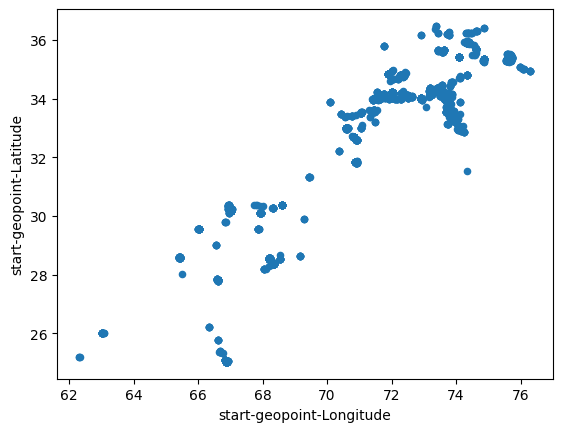

In [77]:
# data processing
#%matplotlib widget
Geo_Location=df.plot.scatter(x="start-geopoint-Longitude", y="start-geopoint-Latitude")
#df.fillna(0)

In [7]:
#same plot using hvplot
df.hvplot.scatter(x="start-geopoint-Longitude", y="start-geopoint-Latitude")

:Scatter   [start-geopoint-Longitude]   (start-geopoint-Latitude)

In [8]:
df.hvplot.scatter(x="start-geopoint-Longitude", y="start-geopoint-Latitude", alpha=0.1) #depending on how many on 1 place opacity of points change

:Scatter   [start-geopoint-Longitude]   (start-geopoint-Latitude)

In [9]:
df.hvplot.hexbin(x="start-geopoint-Longitude", y="start-geopoint-Latitude")

:HexTiles   [start-geopoint-Longitude,start-geopoint-Latitude]

In [10]:
# make dataframe pipeline interactive
df.hvplot.scatter(x="start-geopoint-Longitude", y="start-geopoint-Latitude" , rastersize=True, cnorm="eq_hist", dynspread=True)

:Scatter   [start-geopoint-Longitude]   (start-geopoint-Latitude)

In [67]:
elegible_children_hist= useful_df.hvplot.hist(y="Eligible_Childrens_Sum")

In [66]:
useful_df.hvplot.kde(y="Eligible_Childrens_Sum")   #smooth approximation of the histograms

:Distribution   [Eligible_Childrens_Sum]   (Density)

In [13]:
useful_df.hvplot.hist(y="Eligible_Childrens_Sum" , by="Majority Gender")  #this will color the bin according to categories where female or male are the majority

:NdOverlay   [Majority Gender]
   :Histogram   [Eligible_Childrens_Sum]   (Eligible_Childrens_Sum_count)

In [68]:
useful_df.hvplot.hist(y="Eligible_Childrens_Sum" , by="Majority Gender", subplots=True , shared_axes=False).cols(1)  # when we need subplots rather than 1 plot

:NdLayout   [Majority Gender]
   :Histogram   [Eligible_Childrens_Sum]   (Eligible_Childrens_Sum_count)

In [70]:
#grouping
Majority_Gender=useful_df.hvplot.hist(y="Eligible_Childrens_Sum" , groupby="Majority Gender", subplots=True )

In [16]:
#print(useful_df["Survey_Day"].nunique())
useful_df["Survey_Day"] =  pd.to_datetime(useful_df["Survey_Day"]) #convert format from object to date_type
daily_count=useful_df["Survey_Day"].value_counts()
useful_df_balochistan=useful_df[useful_df['Detail-Province_name']=='Balochistan']
daily_count_balochistan=useful_df_balochistan["Survey_Day"].value_counts()

#print(daily_count_balochistan)
#daily_count_balochistan

C:\Users\smhz_\AppData\Local\Temp\ipykernel_25536\997793970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df["Survey_Day"] =  pd.to_datetime(useful_df["Survey_Day"]) #convert format from object to date_type


In [62]:
daily_survey=daily_count.hvplot(title="Daily survey count") * daily_count_balochistan.hvplot(title="Daily survey count Balochistan") # if we put + we will get another plot

#bifercate for each province
#useful_df["Survey_Day"].hvplot(title="Daily survey count" )

In [19]:
from holoviews.element.tiles import OSM
OSM()

:Tiles   [x,y]

In [71]:
OSM() * df.hvplot.points(x="start-geopoint-Longitude", y="start-geopoint-Latitude", c="Eligible_Childrens_Sum")

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['start-geopoint-Longitude', 'start-geopoint-Latitude']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [21]:
import xarray as xr
import hvplot.xarray
ls=hv.link_selections.instance()  #this allows to select 2 graphs at the same time. honestly its easy to just try it
ls(elegible_children_hist+elegible_children_hist)

BokehModel(combine_events=True, render_bundle={'docs_json': {'e7d0339d-455c-4df4-b078-2abe02c562b6': {'defs': …

In [22]:
import panel as pn

from bokeh.sampledata.autompg import autompg
from io import StringIO

pn.extension(sizing_mode="stretch_width")

In [23]:
df=df[['Enumerator_Name', 'Enumerator_Mobile', 'Survey_Day', "Detail-Province_name", 'Detail-District_name',
       'Detail-Tehsil_name', 'Detail-Estimated_No_of_Households',
        'ss-HH02',
       'ss-HH05', 'ss-HH06', 'ss-HH07', 'ss-HH07_MALE', 'ss-HH07_FEMALE']]


# pd.to_numeric(df)
#df=df["ss-HH02"].astype("int")
#df.dtypes
useful_df.columns

Index(['PREPOPULATE-Cluster_Code', 'Detail-Province_name',
       'Detail-District_name', 'ss-HH02', 'ss-HH08_NAME',
       'Eligible_Childrens_Sum', 'ss-HH07_MALE', 'ss-HH07_FEMALE',
       'Survey_Day', 'Total members', 'Majority Gender'],
      dtype='object')

In [50]:
#provinces=list(df["Detail-Province_name"].unique())
provinces=list(useful_df['Detail-Province_name'].unique())
#using interact
hh_slider=pn.widgets.IntSlider(name="Eligible_Childrens" , start = 0, end=20 )
hh_slider2=pn.widgets.IntSlider(name="Male Household" , start = 0, end=20 )
province=pn.widgets.AutocompleteInput(name="Provinces", options=['AJK', 'Balochistan', 'Gilgit Baltistan', 'Khyber PakhtunKhwa'])
widget = pn.widgets.TextInput(name='Province', value='A string')


In [45]:
provinces=list(useful_df['Detail-Province_name'].unique())
provinces

['AJK', 'Balochistan', 'Gilgit Baltistan', 'Khyber PakhtunKhwa']

In [51]:
dfi = useful_df.interactive(width=1450)
dfi2=dfi[(dfi['Eligible_Childrens_Sum']>hh_slider) & (dfi["ss-HH07_MALE"]>hh_slider2) & (dfi["Detail-Province_name"]==province)].hvplot.table( sortable=True, selectable=True)  
dfi2
#dfi[dfi["Detail-Province_name"]==provinces].head()
#dfi[dfi['ss-HH02']<hh_slider].hvplot(y="ss-HH07", kind="hist", bins=np.linspace(0,50,51))

BokehModel(combine_events=True, render_bundle={'docs_json': {'e8b29bf5-13f4-4503-bb81-5298c04d5036': {'defs': …

In [54]:
pn.pane.Markdown("Hello")   # markdown to add anything to the panel

BokehModel(combine_events=True, render_bundle={'docs_json': {'2ad49978-ada0-4749-9b20-730a044d088f': {'defs': …

In [55]:
pn.panel("Hello")   #instead of having to specify pane type explicitily use panel and it will search for suitbable pane

BokehModel(combine_events=True, render_bundle={'docs_json': {'1ae6bdc3-aabc-49f8-a140-f6bdf92caa96': {'defs': …

In [113]:
useful_df.columns

Index(['PREPOPULATE-Cluster_Code', 'Detail-Province_name',
       'Detail-District_name', 'ss-HH02', 'ss-HH08_NAME',
       'Eligible_Childrens_Sum', 'ss-HH07_MALE', 'ss-HH07_FEMALE',
       'Survey_Day', 'Total members', 'Majority Gender'],
      dtype='object')

In [114]:
filters = {
    'PREPOPULATE-Cluster_Code': {'type': 'number', 'func': '>=', 'placeholder': 'Enter minimum rating'},
    'Detail-Province_name': {'type': 'input', 'func': 'like', 'placeholder': 'Enter title'},
    'Detail-District_name': {'type': 'input', 'func': 'like', 'placeholder': 'Enter title'},

}

In [116]:
# pn.state.template.sidebar_width = 250
# pn.state.template.title="WHO Dashboard"

filter_table = pn.widgets.Tabulator(
    useful_df, pagination='remote', layout='fit_columns', page_size=4, sizing_mode='stretch_width',
    header_filters=filters
)
mini_dashboard2=pn.Column(filter_table)
mini_dashboard2.show()

Launching server at http://localhost:50059


In [78]:
#making new tabs
tabs=pn.Tabs(pn.Column(dfi2))
tabs.append(("Daily Counter",daily_survey ))
tabs.extend([
    ("Majority Gender",Majority_Gender),
    ("Geo Location",Geo_Location)
])
tabs

BokehModel(combine_events=True, render_bundle={'docs_json': {'35fd1560-cd26-4779-9bad-1362184e7750': {'defs': …

In [76]:
tabs.show()

Launching server at http://localhost:63486


In [52]:
mini_dashboard=pn.Column(dfi2)
mini_dashboard.show()

Launching server at http://localhost:62897


In [ ]:
 provinces=list(df["Detail-Province_name"].unique())
 years = pn.widgets.MultiChoice(
     name='Province', options=provinces, margin=(0, 20, 0, 0)
)
#  mpg = pn.widgets.RangeSlider( 
#      name='Mile per Gallon', start=df["Detail-ID"].min(), end=df["Detail-ID"].max()
 #)

 
#df = pn.widgets.DataFrame(df, name='DataFrame')

@pn.depends(years)
def filtered_mpg(province):
    #df = autompg
  
    return df[(df["Detail-Province_name"]==Detail-Province_name )]

# @pn.depends(years, mpg)
# def filtered_mpg(yrs, mpg):
#     #df = autompg
#     if years.value:
#         df = df[df["Detail-Province_name"].isin(yrs)]
#     return df[(df["Detail-ID"] >= mpg[0]) & (df["Detail-ID"] <= mpg[1])]   

# @pn.depends(years, mpg)
# def filtered_file(yr, mpg):
#     df = filtered_mpg(yr, mpg)
#     sio = StringIO()
#     df.to_csv(sio)
#     sio.seek(0)
#     return sio

# fd = pn.widgets.FileDownload(
#     callback=filtered_file, filename='filtered_autompg.csv'
#)

# pn.Column(pn.Row(years, mpg), fd, pn.panel(filtered_mpg, width=600), width=600)

# years = pn.widgets.MultiSelect(name='MultiSelect', value=['Apple', 'Pear'],
#     options=['Apple', 'Banana', 'Pear', 'Strawberry'], size=8)


#  @pn.depends(years)
#  def filtered_mpg(Detail-Province_name):
#       df = df_widget
#       if years.value:
#           df = df_widget[df_widget.yr.isin(yrs)]
#      return df#[(df.mpg >= mpg[0]) & (df.mpg <= mpg[1])]

# @pn.depends(years, mpg)
# def filtered_file(yr, mpg):
#     df = filtered_mpg(yr, mpg)
#     sio = StringIO()
#     df.to_csv(sio)
#     sio.seek(0)
#     return sio

# fd = pn.widgets.FileDownload(
#     callback=filtered_file, filename='filtered_autompg.csv'
# )
pn.Column(pn.Row(years),pn.panel(filtered_mpg, width=600), width=600)
# pn.Column(pn.Row(years, mpg), fd, pn.panel(filtered_mpg, width=600), width=600)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\smhz_\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\smhz_\AppData\Local\Temp\ipykernel_12412\3722433144.py", line 61, in <cell line: 61>
    pn.Column(pn.Row(years),pn.panel(filtered_mpg, width=600), width=600)
  File "c:\Users\smhz_\AppData\Local\Programs\Python\Python310\lib\site-packages\panel\pane\base.py", line 82, in panel
    pane = PaneBase.get_pane_type(obj, **kwargs)(obj, **kwargs)
  File "c:\Users\smhz_\AppData\Local\Programs\Python\Python310\lib\site-packages\panel\param.py", line 790, in __init__
    self._replace_pane()
  File "c:\Users\smhz_\AppData\Local\Programs\Python\Python310\lib\site-packages\panel\param.py", line 842, in _replace_pane
    new_object = self.eval(self.object)
  File "c:\Users\smhz_\AppData\Local\Programs\Python\Python310\lib\site-packages\panel\param.py", line

In [ ]:
years = pn.widgets.MultiChoice(
    name='Years', options=list(autompg.yr.unique()), margin=(0, 20, 0, 0)
)
mpg = pn.widgets.RangeSlider(
    name='Mile per Gallon', start=autompg.mpg.min(), end=autompg.mpg.max()
)

@pn.depends(years, mpg)
def filtered_mpg(yrs, mpg):
    df = autompg
    if years.value:
        df = autompg[autompg.yr.isin(yrs)]
    return df[(df.mpg >= mpg[0]) & (df.mpg <= mpg[1])]

@pn.depends(years, mpg)
def filtered_file(yr, mpg):
    df = filtered_mpg(yr, mpg)
    sio = StringIO()
    df.to_csv(sio)
    sio.seek(0)
    return sio

fd = pn.widgets.FileDownload(
    callback=filtered_file, filename='filtered_autompg.csv'
)

pn.Column(pn.Row(years, mpg), fd, pn.panel(filtered_mpg, width=600), width=600)

BokehModel(combine_events=True, render_bundle={'docs_json': {'75f37f94-52d6-4927-97b1-8ae41734222a': {'defs': …

In [ ]:
x=df.mpg >= mpg[0]
x

AttributeError: 'DataFrame' object has no attribute 'mpg'